# **Best Practices for Writing/Documenting code**
## **Introduction**
This coding assignment will get you used to writing code efficiently as well as documenting your code through various exercises such as efficient data cleaning and Pandas code, as well as designing reusable data workflows. Remember to document all code you write in this assignment, as that will be part of your grade as well.


## **Setup**
The following code will import libraries that will be useful for this assignment.




In [ ]:
!pip install pdpipe
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import pdpipe

%matplotlib inline

## **Shortcuts**


Even if you are familiar with Jupyter, you are strongly encouraged to become proficient with keyboard shortcuts (this will save you time in the future). To learn about keyboard shortcuts, go to **Help --> Keyboard Shortcuts** in the menu above. 

Here are a few that we like:
1. `Ctrl` + `Return` : *Evaluate the current cell*
1. `Shift` + `Return`: *Evaluate the current cell and move to the next*
1. `ESC` : *command mode* (may need to press before using any of the commands below)
1. `a` : *create a cell above*
1. `b` : *create a cell below*
1. `dd` : *delete a cell*
1. `z` : *undo the last cell operation*
1. `m` : *convert a cell to markdown*
1. `y` : *convert a cell to code*

# **Importing Datasets**
The following code will import datasets used in this assignment.

In [ ]:
#next 2 lines temperary
url = 'https://raw.githubusercontent.com/vikashraja24/cs189projectTfinal/main/biostats.csv'
biostats = pd.read_csv(url)
#biostats = pd.read_csv('biostats.csv')

#next 2 lines temperary
url = 'https://raw.githubusercontent.com/vikashraja24/cs189projectTfinal/main/BL-Flickr-Images-Book.csv'
books = pd.read_csv(url)
#books = pd.read_csv('BL-Flickr-Images-Book.csv')

#next 2 lines temperary
url = 'https://raw.githubusercontent.com/vikashraja24/cs189projectTfinal/main/USA_Housing.csv'
housing = pd.read_csv(url)
#housing = pd.read_csv('USA_Housing.csv')
housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


##  **1. Efficient Pandas**
In this question, you will do some exercises in writing Pandas code efficiently, and you will to learn to speed up code when filtering and modifying data.






First, load and examine the biostats dataset.

In [ ]:
biostats

,Name,"""Sex""","""Age""","""Height (in)""","""Weight (lbs)"""
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124
5,Fran,"""F""",33,66,115
6,Gwen,"""F""",26,64,121
7,Hank,"""M""",30,71,158
8,Ivan,"""M""",53,72,175
9,Jake,"""M""",32,69,143


**a)** Part of writing good code means readablilty, and often times datasets have issues of bad column names. Please clean the biostats dataset to have column names [Name, Sex, Age, Height, Weight]. Be sure to document any helper functions or processes in your code.

In [ ]:
### start code ###

#this helper function removes unnecessary elements in column names
clean_names = lambda x: x.replace('"', '').replace('(in)', '').replace('(lbs)', '').replace(' ', '')

biostats = biostats.rename(columns=clean_names)
biostats

### end code ###


,Name,Sex,Age,Height,Weight
0,Alex,"""M""",41,74,170
1,Bert,"""M""",42,68,166
2,Carl,"""M""",32,70,155
3,Dave,"""M""",39,72,167
4,Elly,"""F""",30,66,124
5,Fran,"""F""",33,66,115
6,Gwen,"""F""",26,64,121
7,Hank,"""M""",30,71,158
8,Ivan,"""M""",53,72,175
9,Jake,"""M""",32,69,143


**b)** In this part, you will write two ways of finding the average height of people 30 or older. In this first cell, do not use any Pandas filtering or aggregation methods, and in the second cell, use Pandas method to get the same answer in one line.

In [ ]:
### start code ###

c = []
for i in range(len(biostats["Age"])):
  if biostats["Age"][i] >= 30:
    c.append(biostats["Height"][i])

sum(c)/len(c)

### end code ###

70.07142857142857

In [ ]:
### start code ###

biostats[biostats["Age"] >= 30]["Height"].mean()

### end code ###

70.07142857142857

**c)** Now please time the execution of both methods above to verify the effeciency of the second block.

Hint: check out the timeit library



In [ ]:
### start code ###
start_time = timeit.default_timer()

biostats[biostats["Age"] >= 30]["Height"].mean()

elapsed = timeit.default_timer() - start_time
print("Time: " + str(elapsed))

### end code ###

Time: 0.002162116000363312


In [ ]:
### start code ###
c = []
for i in range(len(biostats["Age"])):
  if biostats["Age"][i] >= 30:
    c.append(biostats["Height"][i])

sum(c)/len(c)

elapsed = timeit.default_timer() - start_time
print("Time: " + str(elapsed))
### end code ###

Time: 0.01650025300023117






##  **2. Pipelines**
In this question, you will do some exercises dealing with data pipelines with the housing data. When talking about the best practices of writing and documenting code in the machine learning context, efficient data pipelines allow for reusable data workflows. The true beauty in pipelines is that it automates repetitive tasks and speeds up the data cleaning. As a machine learning engineer, you may take be tasked to clean and filter multiple datasets. An efficient practice in this case is using pipelines. 

**Hint**: read notes about pdpipe library

First, load and examine the housing dataset.

In [ ]:
housing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


**a)** To start off, create a column called 'Price Range', which categorizes the prices in 3 ranges of low, medium, and high based on the intervals [0, 250000], [250000, 750000], [750000, inf]. Please use a helper function and follow proper style and naming conventions

In [ ]:
### start code ###

#helper function to categorize house prices into [low, medium, high]
def categorize_price(price):
    if price < 25000:
        return 'low'
    elif price >= 250000 and price < 750000:
        return 'medium'
    else:
        return 'high'

housing['Price Range'] = housing['Price'].apply(categorize_price)

housing
### end code ###

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price Range
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",high
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",high
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",high
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,high
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,medium
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,high
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",high
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",high
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,high


**b)** Now, let's assume the Address is useless for the proposed machine learning model. Use a one stage pipeline to drop it.




In [ ]:
### start code ###

drop_avg_income = pdpipe.ColDrop('Address')
housing = drop_avg_income(housing)
housing

### end code ###

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Price Range
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,high
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,high
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,high
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,high
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,medium
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,high
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,high
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,high
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,high


**c)** Now, lets take advantage of the true power of pipelines. Let's say the requirement for data cleaning are to drop the number of bedrooms column, drop the area population column, and then use one-hot-encoding on the price range column. Use one pipeline to make these changes. 

In [ ]:
### start code ###

pipeline = pdpipe.ColDrop('Avg. Area Number of Rooms')
pipeline += pdpipe.ColDrop('Area Population')
pipeline += pdpipe.OneHotEncode('Price Range')
housing = pipeline(housing)
housing

### end code ###

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Bedrooms,Price,Price Range_low,Price Range_medium
0,79545.458574,5.682861,4.09,1.059034e+06,0,0
1,79248.642455,6.002900,3.09,1.505891e+06,0,0
2,61287.067179,5.865890,5.13,1.058988e+06,0,0
3,63345.240046,7.188236,3.26,1.260617e+06,0,0
4,59982.197226,5.040555,4.23,6.309435e+05,0,1
...,...,...,...,...,...,...
4995,60567.944140,7.830362,3.46,1.060194e+06,0,0
4996,78491.275435,6.999135,4.02,1.482618e+06,0,0
4997,63390.686886,7.250591,2.13,1.030730e+06,0,0
4998,68001.331235,5.534388,5.44,1.198657e+06,0,0


Now, you should be able to see how these small modules of pipelines can be similar across datasets for cleaning specifications and how this practice can be lead very efficient, readable, and reusable code. 

##  **3. Efficient Practices to Visualize Code**
 Now you will take a look at efficient pracitces for graphing, inlcuding documenting, labeling, and scaling graphs based on the results needed.




**a)** Let's examine the relationship between the average income and the price of a house in the housing data. Use a scatter plot to plot price vs income for the first 100 entries in the data.




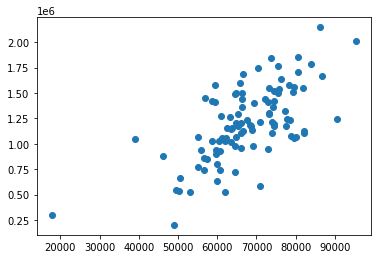

In [ ]:
### start code ###

x = housing["Avg. Area Income"][:100]
y = housing["Price"][:100]

plt.scatter(x, y)

### end code ###

**b)** Now, looking at the correlation, you may see that the scales make it hard to recognize the details of the correlation. Include an appropriate scaled axis to make the correlation more aligned to the unity line.

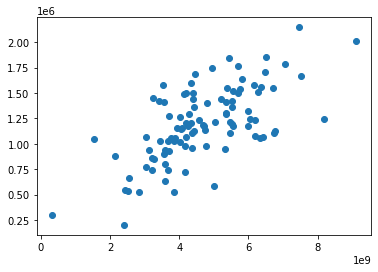

In [ ]:
### start code ###

x = [x**2 for x in housing["Avg. Area Income"][:100]]
y = housing["Price"][:100]

plt.scatter(x, y)

### end code ###

**c)** Now, using appropiate practices of documentation and labeling, include labels for axes and title for the plot taking into account the scaling you did in part b.

Text(0.5, 1.0, 'Price vs (Avg. Area Income)^2')

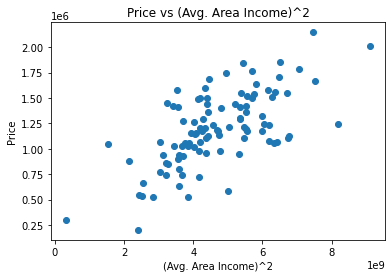

In [ ]:
### start code ###

x = [x**2 for x in housing["Avg. Area Income"][:100]]
y = housing["Price"][:100]

plt.scatter(x, y)
plt.xlabel("(Avg. Area Income)^2")
plt.ylabel("Price")
plt.title("Price vs (Avg. Area Income)^2")

### end code ###

##  **4. Cleaning Data Efficiently with Documentation**
In this problem, you will walk through cleaning a messy dataset, incorporating the efficient pracitices of writing and documenting code that you have learned so far. For documentation purposes, keep a dictionary of keys removed and modified that keeps tracks of all processes done on the dataset throughout the cleaning process. Use appropriate comments on all functions.

First, load and examine the books dataset.

In [ ]:
cleaning_updates = {'remove': [], 'modify': []}
books

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


**a)** First find and print all columns that contain any sort of empty values. However, if Author has empty values, replace those with the empty string. Update the cleaning_updates.


In [ ]:
### start code ###

books['Author'] = books['Author'].fillna('')
nan_values = books.isna()
nan_columns = nan_values.any()
columns_with_nan = books.columns[nan_columns].tolist()
print(columns_with_nan)

#adds to dictionary
for column in columns_with_nan:
  cleaning_updates['remove'].append(column)
cleaning_updates['modify'].append('Author')

### end code ###

['Edition Statement', 'Date of Publication', 'Publisher', 'Corporate Author', 'Corporate Contributors', 'Former owner', 'Engraver']


**b)** Now, drop all the columns that need to be removed, due to not having complete data.

In [ ]:
### start code ###
books = books.dropna(axis='columns')
books
### end code ###

,Identifier,Place of Publication,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
0,206,London,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,London; Virtue & Yorston,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...
8282,4158088,London,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,Derby,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,London,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,Newcastle upon Tyne,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


**c)** Remove the unnecessary brackets in the title names efficiently. Remember to practice good documentation and use of helper methods for readable and reproducible code.

In [ ]:
### start code ###

#removes unncessary brackets in title names
def clean_title(title):
    if '[' in title:
        title = title[:title.find('[')]
    title.replace('.', '')
    title = title[:len(title)-1]
    return ' '.join(list(map(str.capitalize, title.split())))

    
books['Title'] = books['Title'].apply(clean_title)
cleaning_updates['modify'].append('Title')
books

### end code ###

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Identifier,Place of Publication,Title,Author,Contributors,Issuance type,Flickr URL,Shelfmarks
0,206,London,Walter Forbes.,A. A.,"FORBES, Walter.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,London; Virtue & Yorston,All For Greed.,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,London,Love The Avenger. By The Author Of “all For Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,London,"Welsh Sketches, Chiefly Ecclesiastical, To The...","A., E. S.","Appleyard, Ernest Silvanus.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,London,,"A., E. S.","BROOME, John Henry.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.
...,...,...,...,...,...,...,...,...
8282,4158088,London,"The Parochial History Of Cornwall, Founded On,","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,Derby,The History And Gazetteer Of The County Of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,London,Magna Britannia; Being A Concise Topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,Newcastle upon Tyne,"An Historical, Topographical And Descriptive V...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...


In [ ]:
cleaning_updates

{'modify': ['Author', 'Title'],
 'remove': ['Edition Statement',
  'Date of Publication',
  'Publisher',
  'Corporate Author',
  'Corporate Contributors',
  'Former owner',
  'Engraver']}

Going through the cleaning process with reusable blocks of code as well as documenting any changes to the intial data set is a good practice of documentation in the data cleaning context.

##  **Learning Objectives**
After performing this assignment, student should develop improved documentation and code writing skills in the context of machine learning. They developed simple and efficient ways to clean and filter data, learned a way to make a simple reusable data pipeline, and throughout the process, were asked to follow the best practices of documentation including adding comments and using helper functions when needed to make code simple, readable, and reproducible.